In [ ]:
!pip install ucimlrepo

CHARGEMENT DU DATASET WHOLESALE CUSTOMERS

--- MÉTADONNÉES ---
{'uci_id': 292, 'name': 'Wholesale customers', 'repository_url': 'https://archive.ics.uci.edu/dataset/292/wholesale+customers', 'data_url': 'https://archive.ics.uci.edu/static/public/292/data.csv', 'abstract': 'The data set refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 440, 'num_features': 7, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Region'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2013, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5030X', 'creators': ['Margarida Cardoso'], 'intro_paper': None, 'additional_info': {'summary': None, 'purpose': None, 'funded_by': None, 'instances_represent': None, 'recommended_data_spli

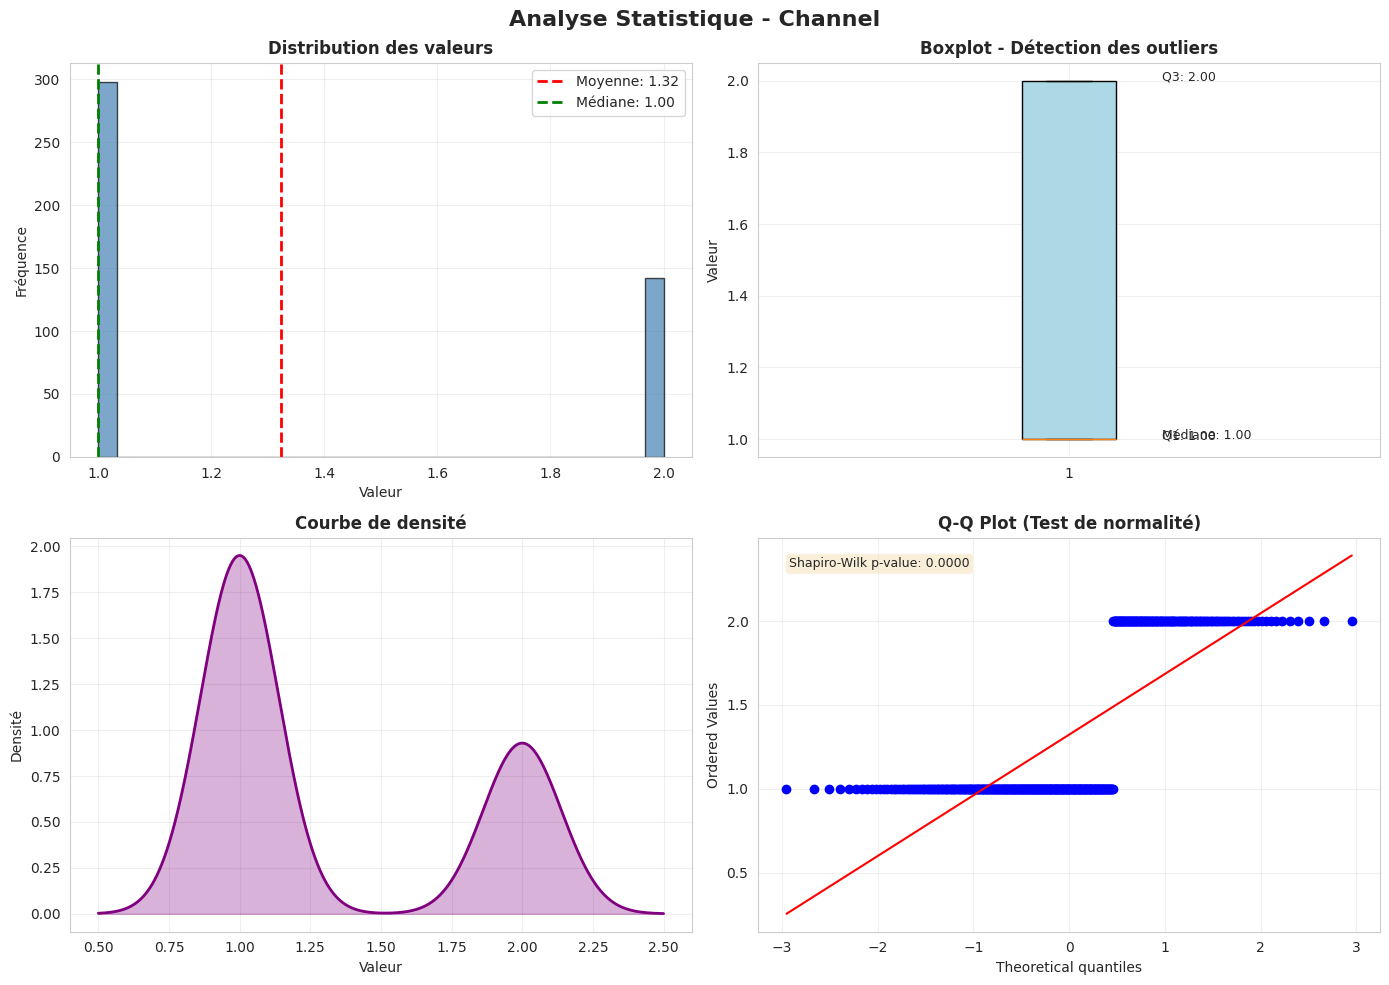

✓ Graphiques générés pour Channel


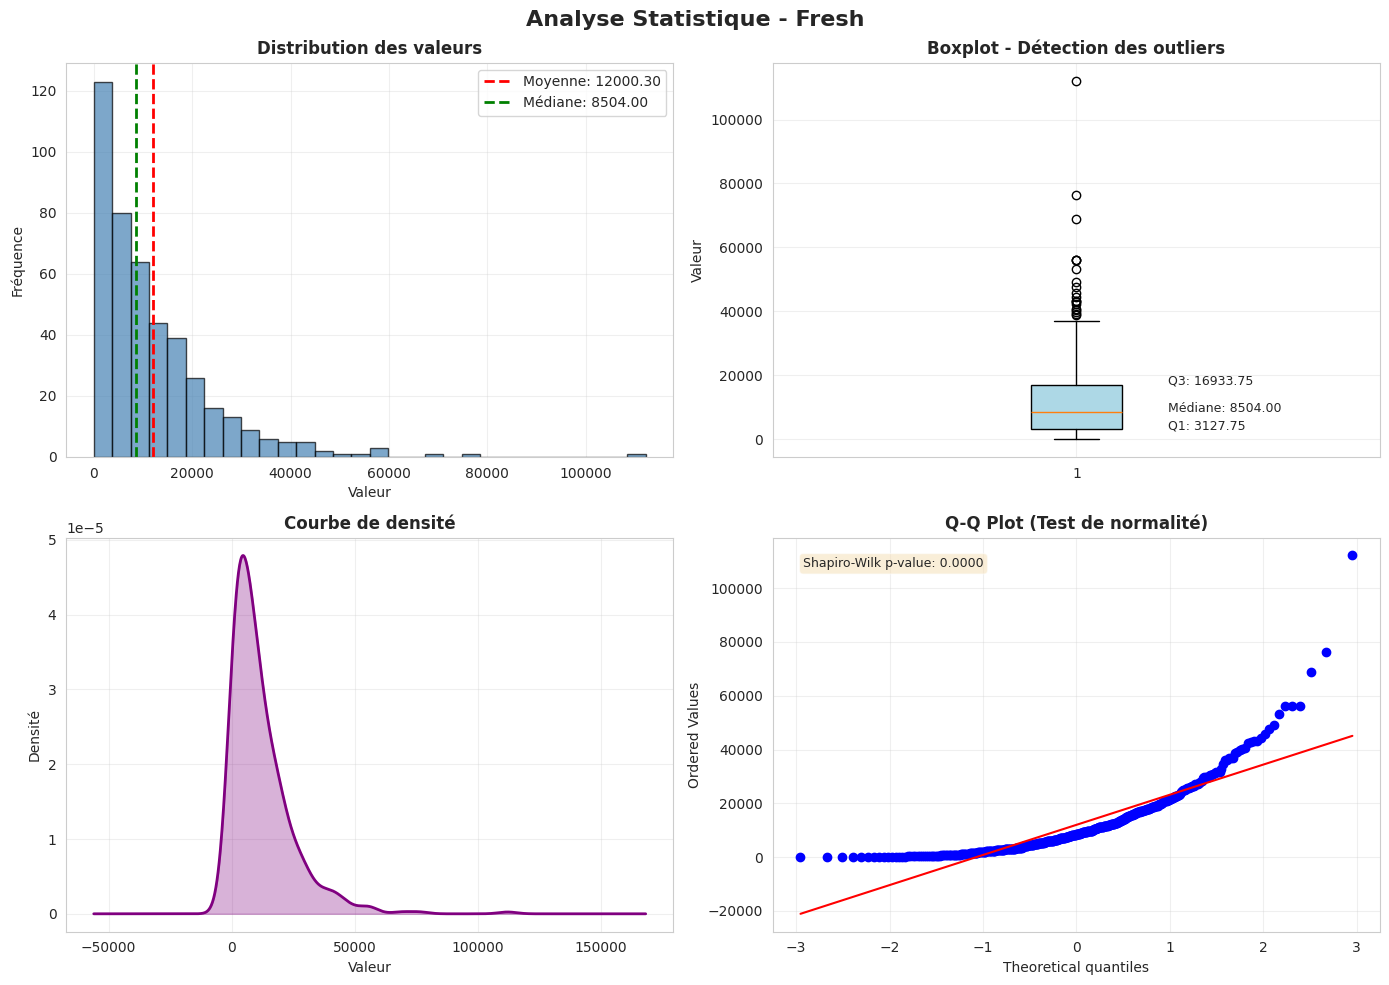

✓ Graphiques générés pour Fresh


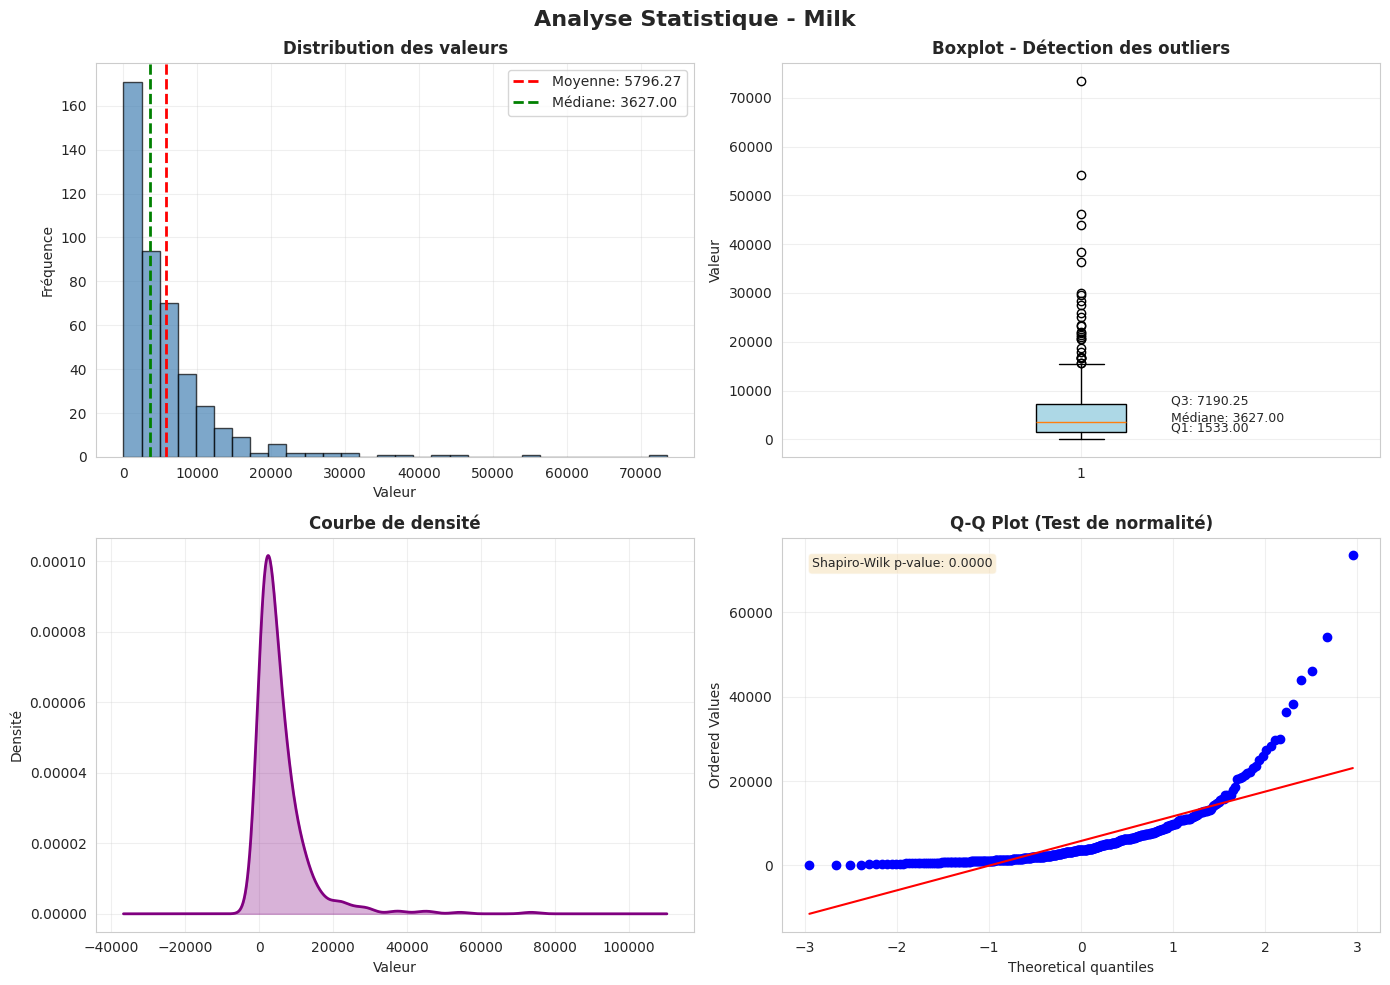

✓ Graphiques générés pour Milk


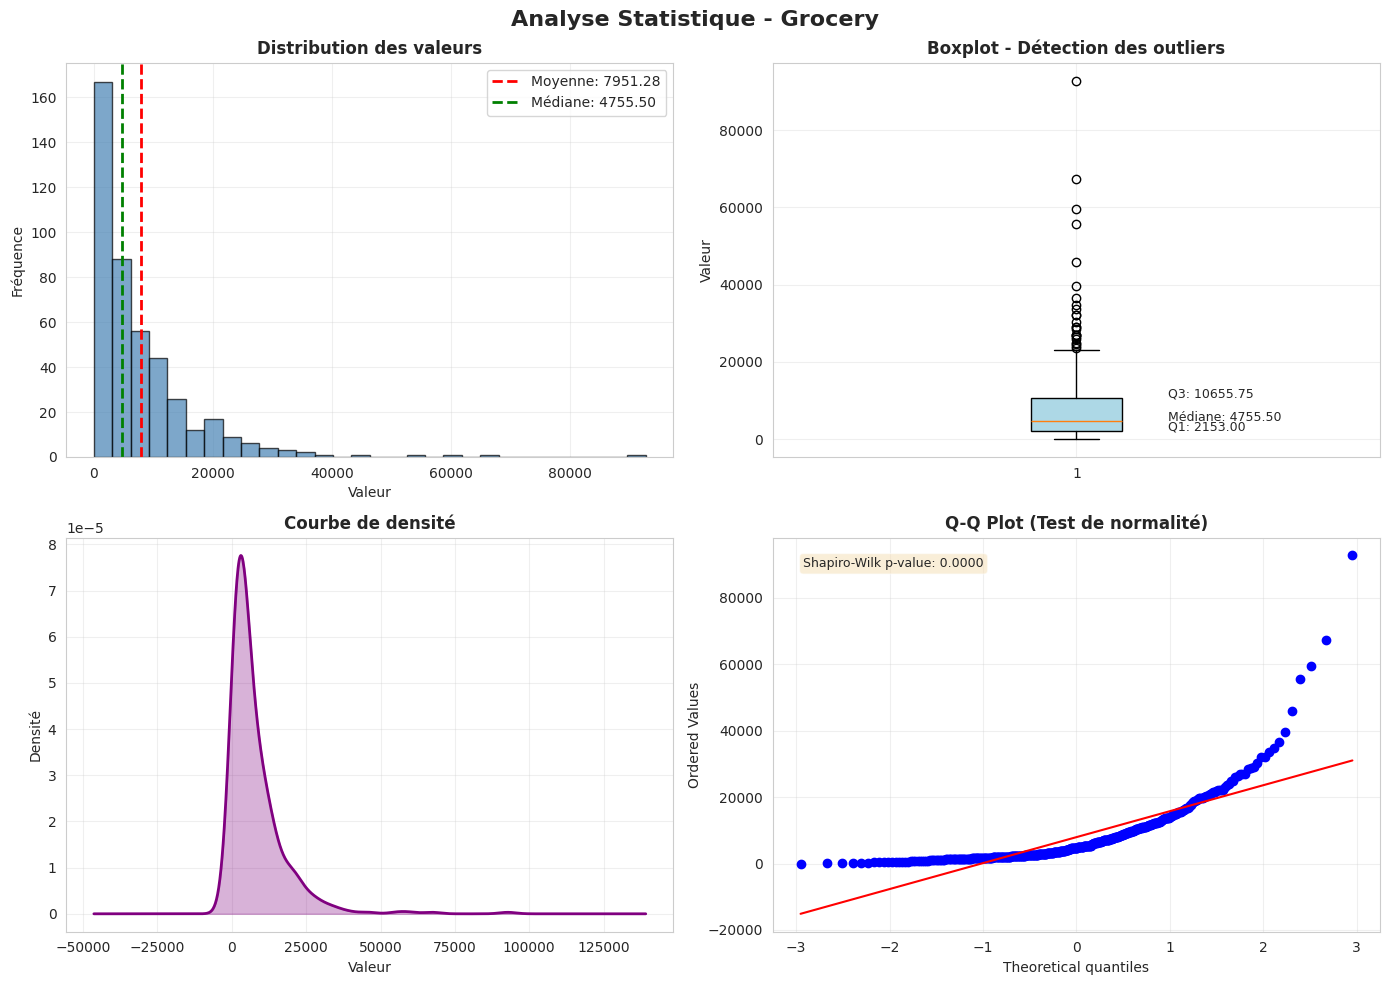

✓ Graphiques générés pour Grocery


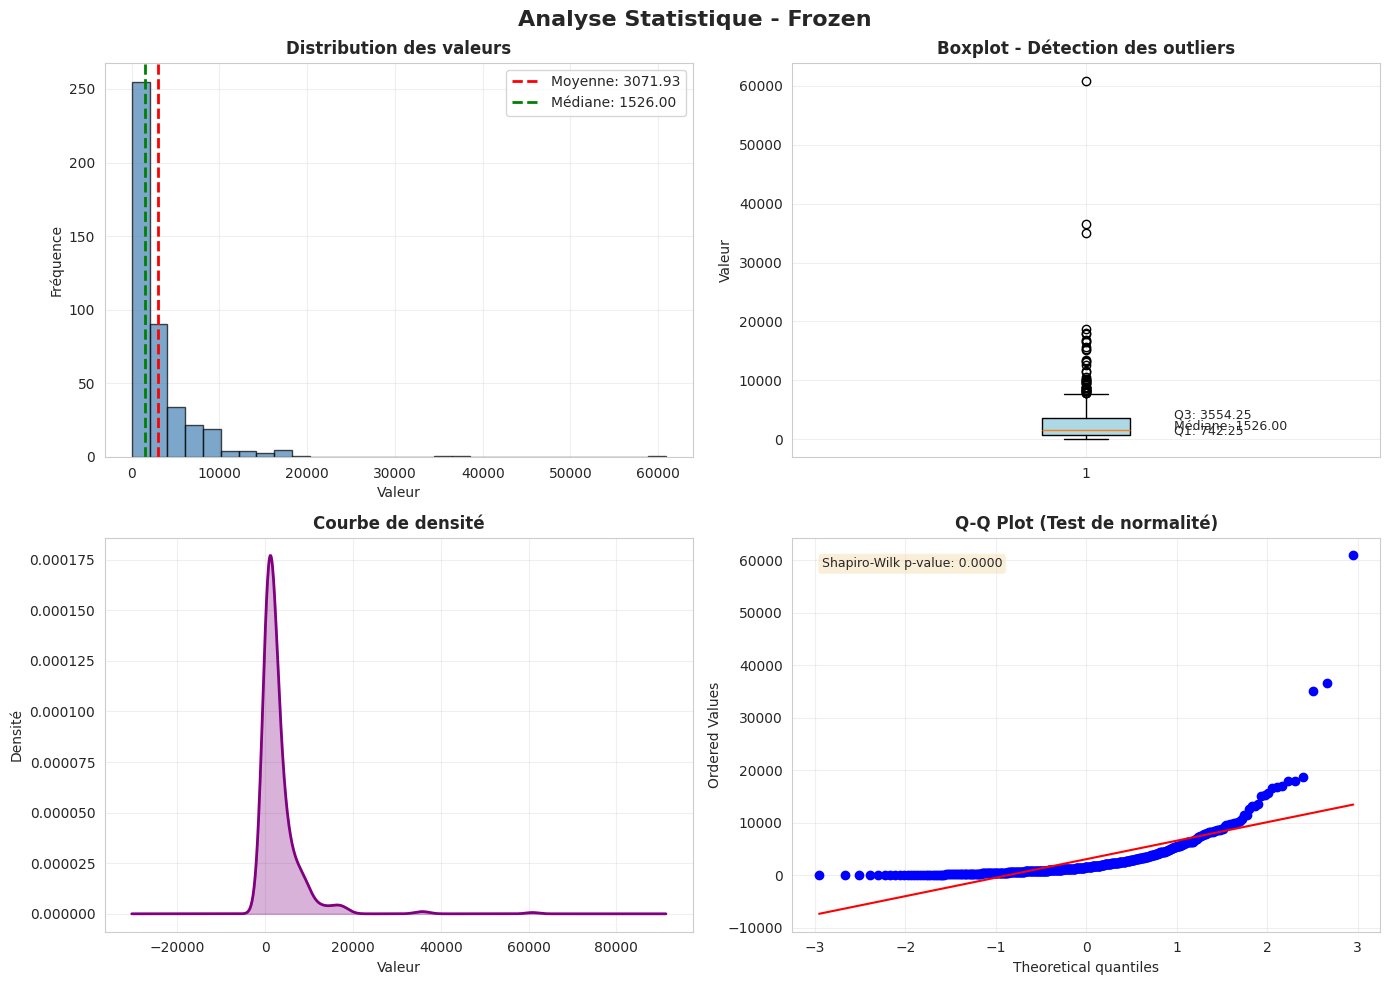

✓ Graphiques générés pour Frozen


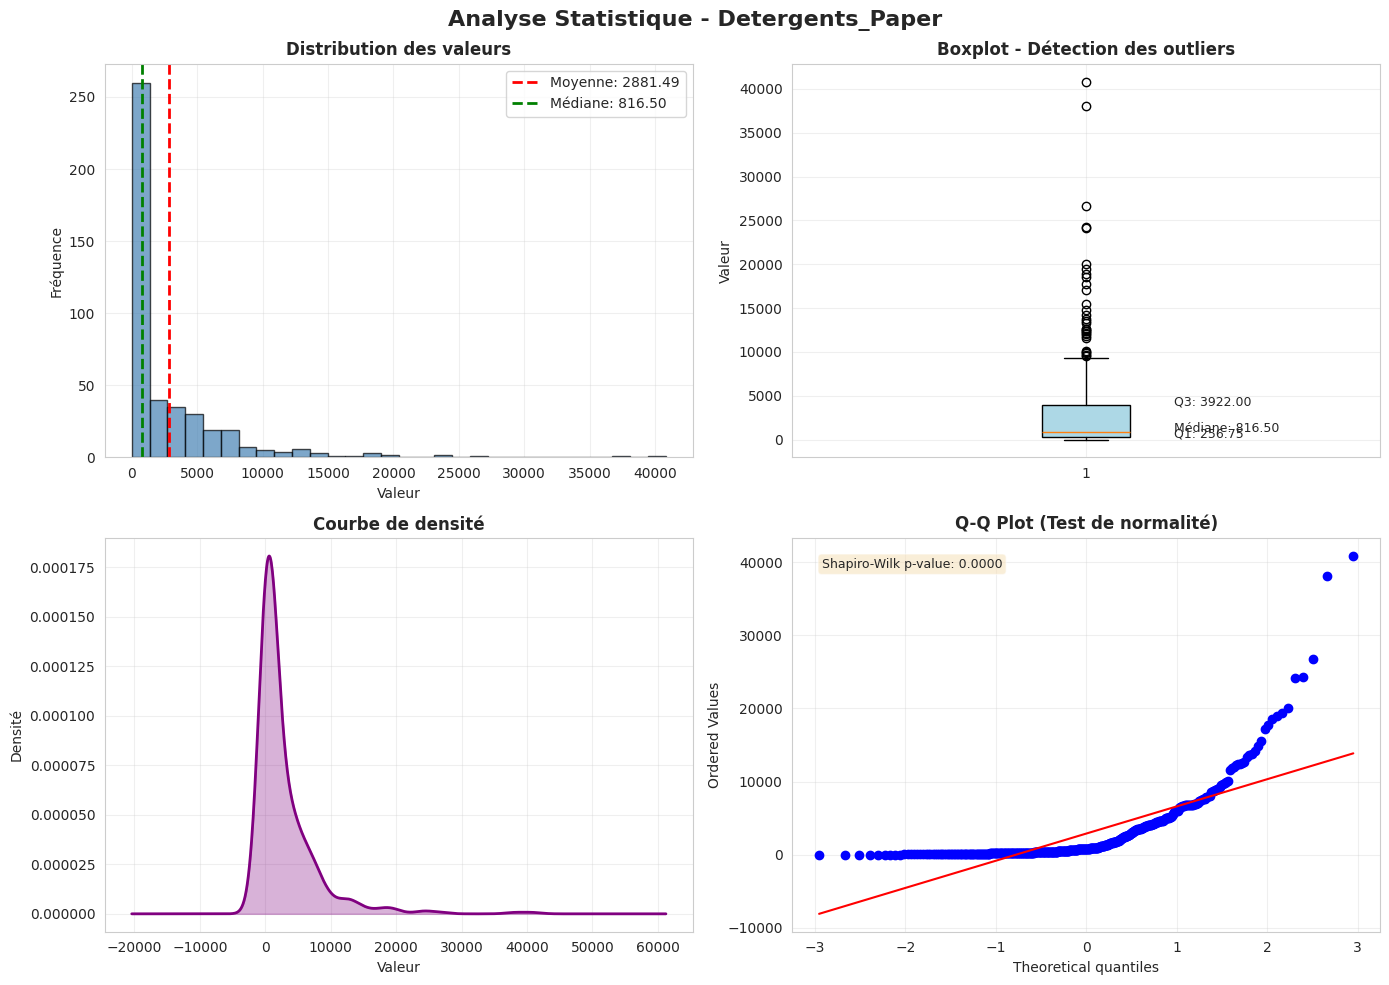

✓ Graphiques générés pour Detergents_Paper


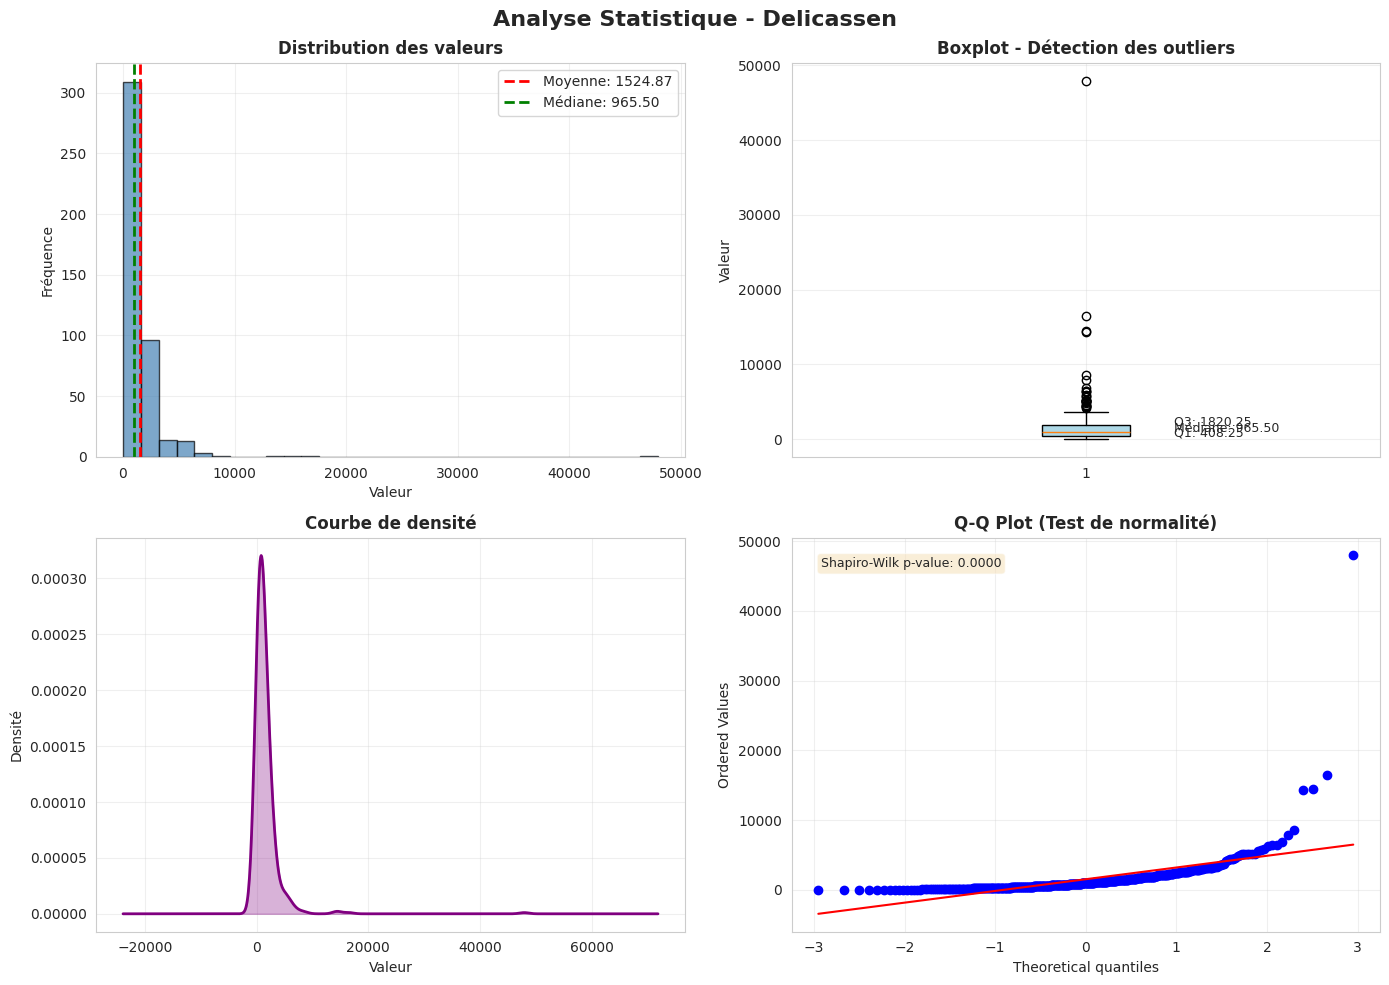

✓ Graphiques générés pour Delicassen


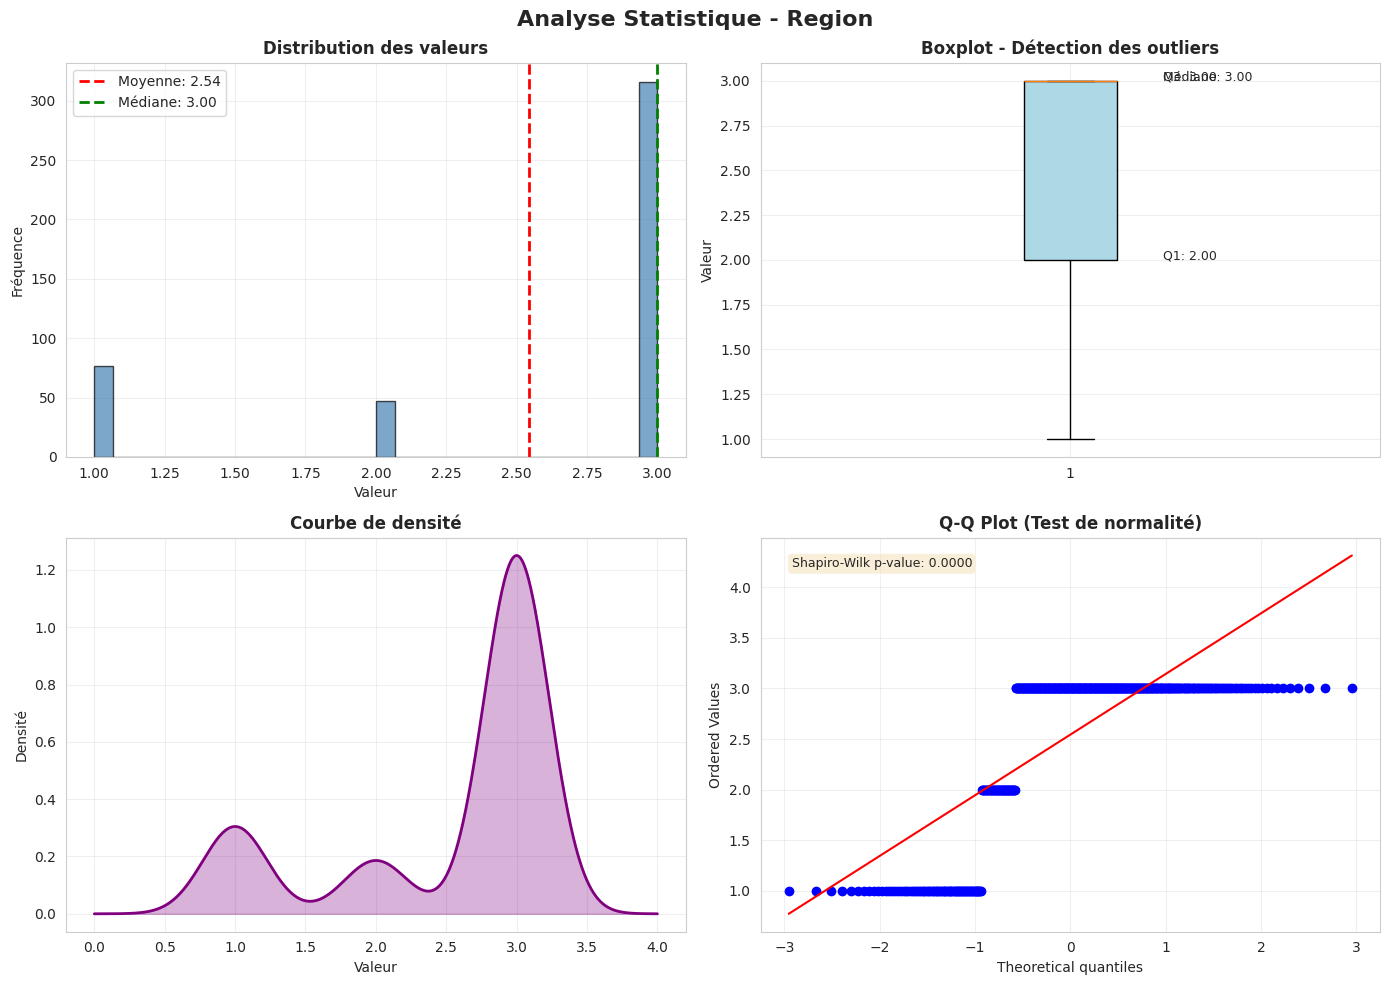

✓ Graphiques générés pour Region

MATRICE DE CORRÉLATION


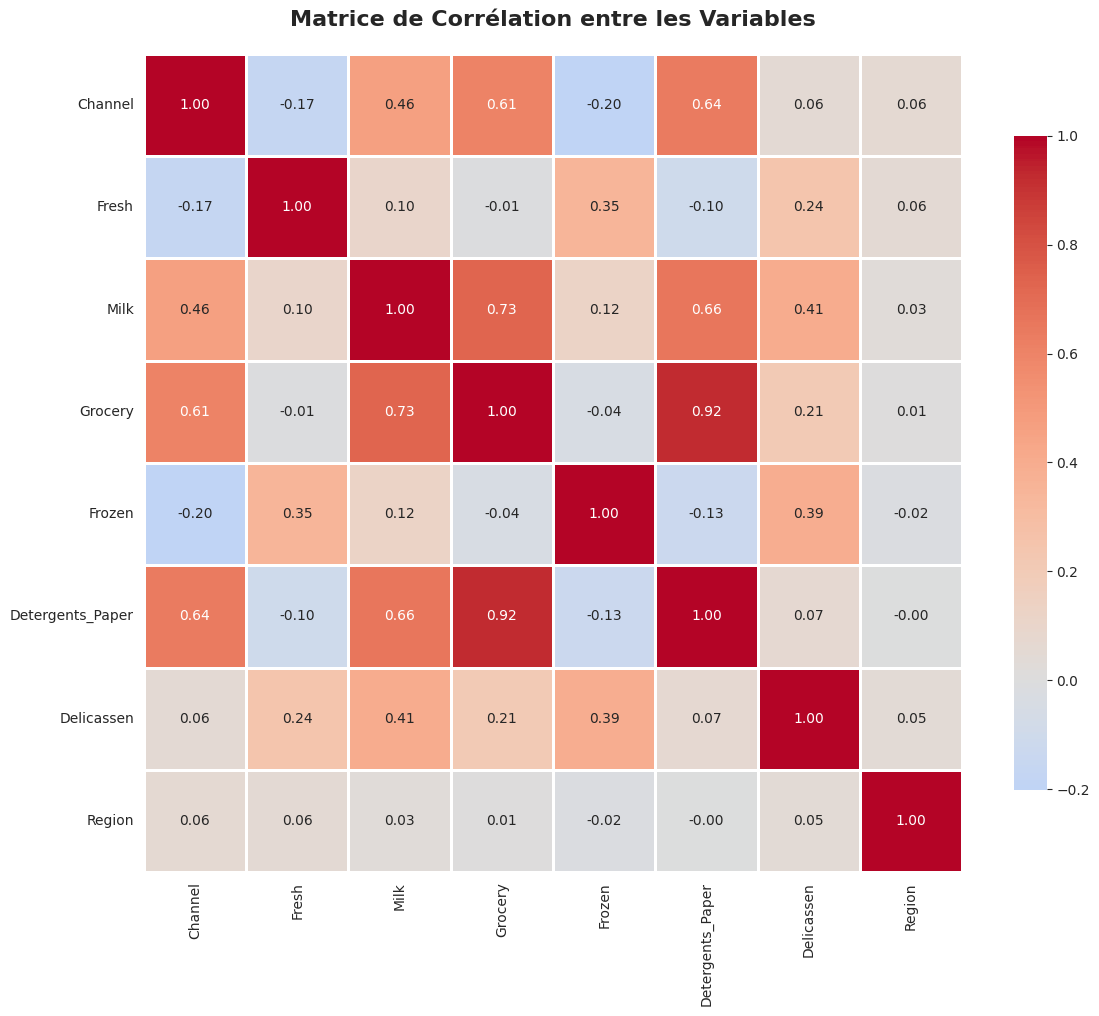

✓ Matrice de corrélation générée

ANALYSE PAR CANAL

Répartition par Canal:
Channel
1    298
2    142
Name: count, dtype: int64


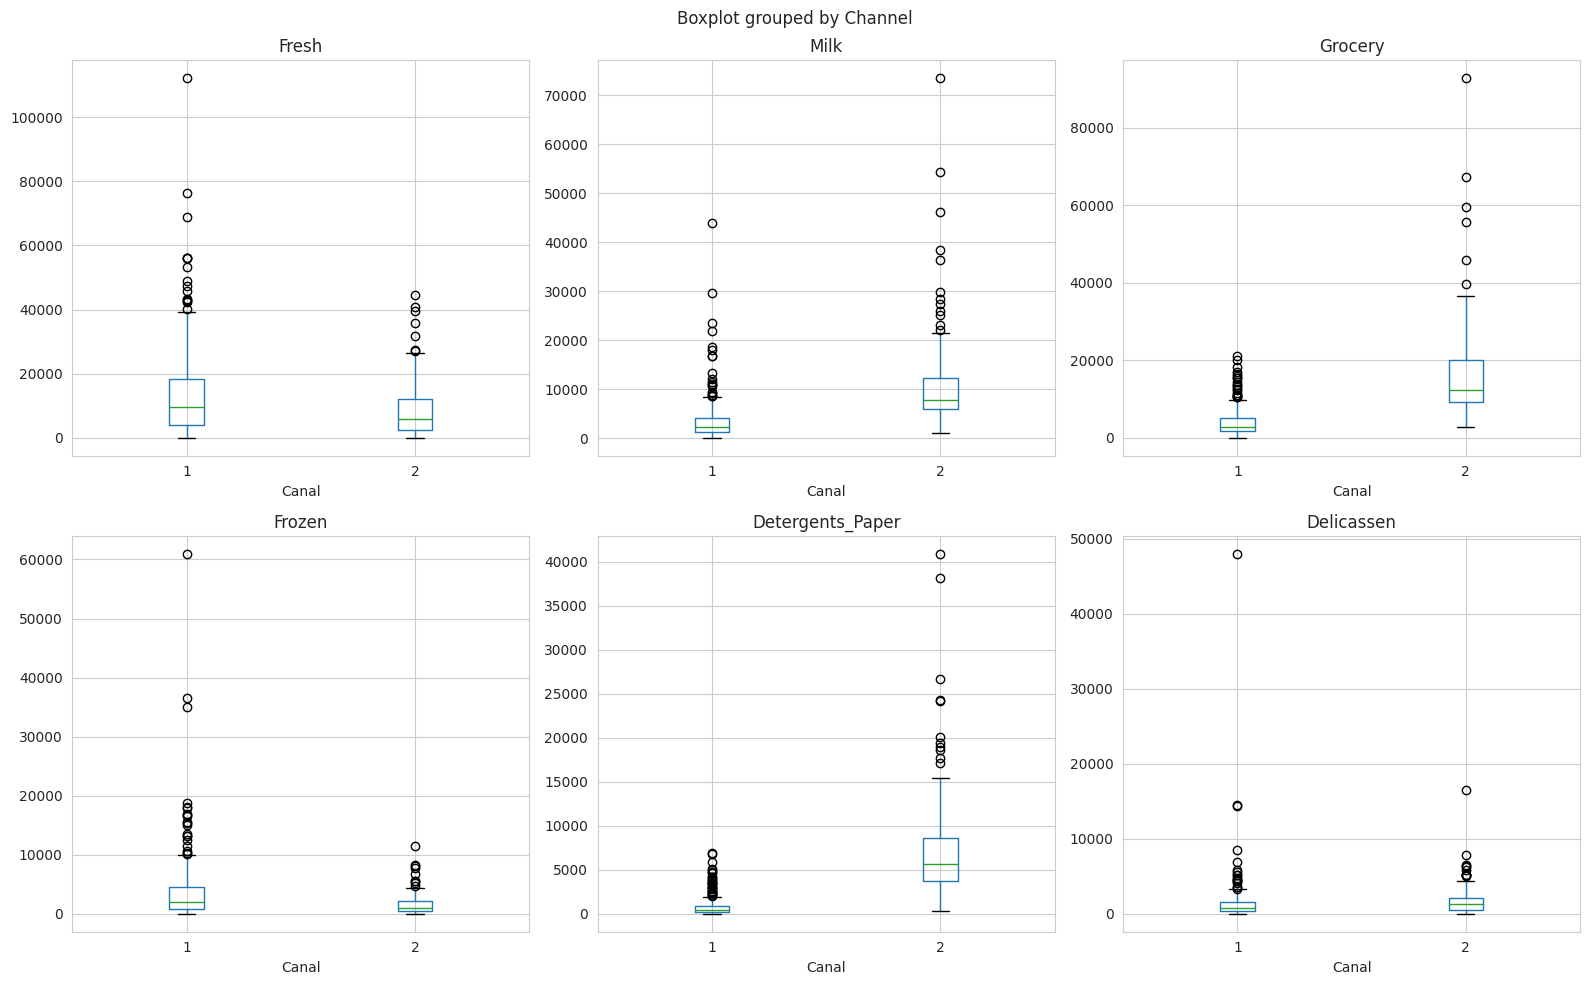

✓ Analyse par canal générée

ANALYSE TERMINÉE AVEC SUCCÈS!


In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# ========== CHARGEMENT DES DONNÉES ==========
print("=" * 60)
print("CHARGEMENT DU DATASET WHOLESALE CUSTOMERS")
print("=" * 60)

# Fetch dataset
wholesale_customers = fetch_ucirepo(id=292)

# Data (as pandas dataframes)
X = wholesale_customers.data.features
y = wholesale_customers.data.targets

# Combiner X et y pour l'analyse complète
df = pd.concat([X, y], axis=1)

# Afficher les métadonnées
print("\n--- MÉTADONNÉES ---")
print(wholesale_customers.metadata)

print("\n--- INFORMATIONS SUR LES VARIABLES ---")
print(wholesale_customers.variables)

# ========== EXPLORATION DES DONNÉES ==========
print("\n" + "=" * 60)
print("EXPLORATION DES DONNÉES")
print("=" * 60)

print("\n--- Premières lignes du dataset ---")
print(df.head())

print("\n--- Informations sur le dataset ---")
print(df.info())

print("\n--- Statistiques descriptives globales ---")
print(df.describe())

# ========== STATISTIQUES DESCRIPTIVES DÉTAILLÉES ==========
print("\n" + "=" * 60)
print("STATISTIQUES DESCRIPTIVES DÉTAILLÉES PAR VARIABLE")
print("=" * 60)

# Sélectionner les colonnes numériques
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    print(f"\n{'=' * 60}")
    print(f"VARIABLE: {col}")
    print(f"{'=' * 60}")

    colonne = df[col].dropna()

    print(f"Nombre d'observations: {len(colonne)}")
    print(f"Valeurs manquantes: {df[col].isna().sum()}")
    print(f"Moyenne: {colonne.mean():.2f}")
    print(f"Médiane: {colonne.median():.2f}")
    print(f"Mode: {colonne.mode()[0]:.2f}" if len(colonne.mode()) > 0 else "Mode: N/A")
    print(f"Écart-type: {colonne.std():.2f}")
    print(f"Variance: {colonne.var():.2f}")
    print(f"Min: {colonne.min():.2f}")
    print(f"Max: {colonne.max():.2f}")
    print(f"Q1 (25%): {colonne.quantile(0.25):.2f}")
    print(f"Q2 (50% - Médiane): {colonne.quantile(0.50):.2f}")
    print(f"Q3 (75%): {colonne.quantile(0.75):.2f}")
    print(f"IQR (Écart interquartile): {colonne.quantile(0.75) - colonne.quantile(0.25):.2f}")
    print(f"Asymétrie (Skewness): {colonne.skew():.2f}")
    print(f"Kurtosis: {colonne.kurtosis():.2f}")

# ========== VISUALISATIONS ==========
print("\n" + "=" * 60)
print("GÉNÉRATION DES VISUALISATIONS")
print("=" * 60)

# Configuration du style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

# Créer des visualisations pour chaque variable numérique
for col in numeric_cols:
    colonne = df[col].dropna()

    # Créer une figure avec plusieurs sous-graphiques
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle(f'Analyse Statistique - {col}', fontsize=16, fontweight='bold')

    # 1. Histogramme avec moyenne et médiane
    axes[0, 0].hist(colonne, bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[0, 0].set_title('Distribution des valeurs', fontsize=12, fontweight='bold')
    axes[0, 0].set_xlabel('Valeur')
    axes[0, 0].set_ylabel('Fréquence')
    axes[0, 0].axvline(colonne.mean(), color='red', linestyle='--', linewidth=2,
                       label=f'Moyenne: {colonne.mean():.2f}')
    axes[0, 0].axvline(colonne.median(), color='green', linestyle='--', linewidth=2,
                       label=f'Médiane: {colonne.median():.2f}')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Boxplot pour détecter les outliers
    bp = axes[0, 1].boxplot(colonne, vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    axes[0, 1].set_title('Boxplot - Détection des outliers', fontsize=12, fontweight='bold')
    axes[0, 1].set_ylabel('Valeur')
    axes[0, 1].grid(True, alpha=0.3)

    # Ajouter les statistiques sur le boxplot
    q1, median, q3 = colonne.quantile([0.25, 0.5, 0.75])
    axes[0, 1].text(1.15, q1, f'Q1: {q1:.2f}', fontsize=9)
    axes[0, 1].text(1.15, median, f'Médiane: {median:.2f}', fontsize=9)
    axes[0, 1].text(1.15, q3, f'Q3: {q3:.2f}', fontsize=9)

    # 3. Courbe de densité
    colonne.plot(kind='density', ax=axes[1, 0], color='purple', linewidth=2)
    axes[1, 0].set_title('Courbe de densité', fontsize=12, fontweight='bold')
    axes[1, 0].set_xlabel('Valeur')
    axes[1, 0].set_ylabel('Densité')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].fill_between(axes[1, 0].get_lines()[0].get_xdata(),
                            axes[1, 0].get_lines()[0].get_ydata(),
                            alpha=0.3, color='purple')

    # 4. Q-Q Plot pour tester la normalité
    stats.probplot(colonne, dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('Q-Q Plot (Test de normalité)', fontsize=12, fontweight='bold')
    axes[1, 1].grid(True, alpha=0.3)

    # Ajouter le test de normalité (Shapiro-Wilk)
    if len(colonne) < 5000:  # Shapiro-Wilk fonctionne mieux pour n < 5000
        stat, p_value = stats.shapiro(colonne)
        axes[1, 1].text(0.05, 0.95, f'Shapiro-Wilk p-value: {p_value:.4f}',
                       transform=axes[1, 1].transAxes, fontsize=9,
                       verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    plt.tight_layout()
    plt.show()
    print(f"✓ Graphiques générés pour {col}")

# ========== MATRICE DE CORRÉLATION ==========
print("\n" + "=" * 60)
print("MATRICE DE CORRÉLATION")
print("=" * 60)

plt.figure(figsize=(12, 10))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Matrice de Corrélation entre les Variables', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()
print("✓ Matrice de corrélation générée")

# ========== DISTRIBUTION PAR CANAL (si la variable Channel existe) ==========
if 'Channel' in df.columns:
    print("\n" + "=" * 60)
    print("ANALYSE PAR CANAL")
    print("=" * 60)

    print("\nRépartition par Canal:")
    print(df['Channel'].value_counts())

    # Boxplot comparatif par canal
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    fig.suptitle('Distribution des Variables par Canal', fontsize=16, fontweight='bold')

    product_cols = [col for col in numeric_cols if col not in ['Channel', 'Region']]

    for idx, col in enumerate(product_cols[:6]):
        row = idx // 3
        col_idx = idx % 3
        df.boxplot(column=col, by='Channel', ax=axes[row, col_idx])
        axes[row, col_idx].set_title(col)
        axes[row, col_idx].set_xlabel('Canal')

    plt.tight_layout()
    plt.show()
    print("✓ Analyse par canal générée")

print("\n" + "=" * 60)
print("ANALYSE TERMINÉE AVEC SUCCÈS!")
print("=" * 60)